# Notebook - The Basics of Machine Learning 

Where going to do three things here: 

  1. Show the simplest form of learning (no frameworks, just code), by learning the function `f(x) = 3x`
  2. Show the same example using PyTorch and a basic neural network

## Let's learn a linear function 

`f(x) = 3x` is a linear function. Linear functions are of the form `f(x) = a + bx` (and used interchangably with `y = a + bx`) where 'a' is the y intercept, 'b' is the coefficient (or parameter, just like in machine learning), and 'x' is the independent variable. If you plot it over x, it looks like this:
![](https://zd8d32753f2xm110ee.s3-us-west-2.amazonaws.com/images/2019-11-13_10-29-48.png)

The thing we want the machine to learn here is 'b', or in our example case '3'. In machine learning terms, this is the 'parameter' or 'weight' we would like to learn (in fact, from here, we'll be using 'weight' as the nomenclature). We'd like to learn that parameter using nothing other than some example data:

|x   |f(x)|'b' in f(x)|
|----|----|-----------|
|1   |3   |3          |
|3   |9   |3          |
|5   |15  |3          |


We can learn the parameter 'b' fairly easily, by: 
 * starting with a random value for 'b'
 * performing the calculation 'b * x'
 * checking how far off we are (the error)
 * nudging the 'weight' in the right direction to minimize the error
 * repeat until error is 0

In [1]:
import random

# let's get a random starting value for parameter 'b'
# we will call this 'weight' to conform with machine learning vocabulary

weight = random.uniform(0, 1)  # generates random float between 0 and 1 

x = 3  # our example input data (only one sample)
y = 9  # our example result (y = 3 * 3)

for i in range(90):
    prediction = x * weight
    error = prediction - y  
    
    if i % 10 == 0:  # print out log every 10 iterations
        print('current weight for "b" is: {:0.2f} and gives error: {:0.2f}'.format(weight, error))
   
    # nudge the weight in the right direction to minimize the error next time
    if error >= 0:
        weight -= 0.05
    else:
        weight += 0.05
        
    # if we're super close to zero, we've learned the parameter
    if error <= 0.1 and error >= -0.1:
        print('')
        print('we found a good weight that minimizes error!')
        print('y = weight * x')
        print('{} = {:.2f} x {:.2f}'.format(weight * x, weight, x))
        break

current weight for "b" is: 0.79 and gives error: -6.63
current weight for "b" is: 1.29 and gives error: -5.13
current weight for "b" is: 1.79 and gives error: -3.63
current weight for "b" is: 2.29 and gives error: -2.13
current weight for "b" is: 2.79 and gives error: -0.63

we found a good weight that minimizes error!
y = weight * x
9.121440469968388 = 3.04 x 3.00


### Important things to note

* The result of the final calculation is probably slightly off -- this is because our bounds check around error isn't error == 0. Given we're incrementing and decrementing by a fixed value of 0.05, we'll never get to zero error (we "won't converge" as they say in machine learning terminology)
* We only used one example to learn from (you can modify this example to include multiple input data examples)
* The example can be broken up into three distinct parts: 
  * Defining the **input examples** (`x = 3; y = 9`), or the **'data'**
  * The **'training loop'** (`for i in range(90)`)
  * The **'inference' result** (the end calculation of `weight * x`)
* These three distinct parts are the basic building blocks of machine learning: data, training, inference.

Let's do the exact same thing of learning the parameter 'b' in PyTorch:

In [2]:
# import pytorch and the matplotlib graphing API

import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from typing import List

In [3]:
# this is a simple helper we're defining to plot the results of our learned PyTorch model
# don't worry about this for now

def plot_result(net: nn.Module, X: List[torch.Tensor] , Y: List[torch.Tensor]):
    results = [net(torch.tensor([y]).float()).item() for y in X]
    plt.plot(X, results) 
    plt.scatter(X, Y)
    plt.show()

In [4]:
# define a simple neural network model in PyTorch that will help us learn
# f(x) = bx + 0

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 1)
       
    def forward(self, x):
        x = self.fc1(x)
        return x

How the PyTorch network definition API's work are left as an exercise to the reader (reasonable tutorial [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)), but the `self.fc1 = nn.Linear(1, 1)` is defining a simple neural network with one input node and one output node -- exactly enough to learn the parameter 'b' that we care about:

![](https://zd8d32753f2xm110ee.s3-us-west-2.amazonaws.com/images/2019-11-13_15-34-21.png)

In [5]:
# instantiate our network. The 'weight' in the linear layer will be randomly seeded.
net = Net()

# define the function that will calculate our 'error'
def loss_function(prediction, actual):
    return (actual - prediction)**2

# we need an **'optimizer'**, basically an algorithm that will figure out how to adjust the
# weight every time we try the network and get some error (or loss).
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.2)

In [6]:
# DATA
###############
# let's create some data to learn for the linear function y = 3x:
X = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Y = [3.0, 6.0, 9.0, 12.0, 15.0, 18.0]

# TRAINING LOOP
###############

# perform the training loop lots of times
for epoch in range(201):
    
    # loop through each of the data examples
    for i in range(len(X)):
        x = torch.tensor([X[i]], requires_grad=True)
        y = torch.tensor([Y[i]], requires_grad=False)
        
        optimizer.zero_grad()
        
        prediction = net(x)
        
        loss = loss_function(prediction, y)
        
        loss.backward()
        
        optimizer.step()
        
        if (epoch % 20 == 0 and i % 20 == 0):
            print('Epoch {:3}, weight: {}, x.grad: {}, loss: {}, prediction: {}'.format(str(epoch),
                                                                           '{:.3f}'.format(net.fc1.weight.item()),
                                                                           '{:.3f}'.format(x.grad.item()),
                                                                           '{:.3f}'.format(loss.item()),
                                                                           '{:.3f}'.format(prediction.item())))

Epoch 0  , weight: 0.989, x.grad: -4.426, loss: 5.517, prediction: 0.651
Epoch 20 , weight: 2.970, x.grad: 0.795, loss: 0.018, prediction: 3.134
Epoch 40 , weight: 2.984, x.grad: 0.435, loss: 0.005, prediction: 3.073
Epoch 60 , weight: 2.991, x.grad: 0.238, loss: 0.002, prediction: 3.040
Epoch 80 , weight: 2.995, x.grad: 0.130, loss: 0.000, prediction: 3.022
Epoch 100, weight: 2.997, x.grad: 0.071, loss: 0.000, prediction: 3.012
Epoch 120, weight: 2.999, x.grad: 0.039, loss: 0.000, prediction: 3.006
Epoch 140, weight: 2.999, x.grad: 0.021, loss: 0.000, prediction: 3.004
Epoch 160, weight: 3.000, x.grad: 0.011, loss: 0.000, prediction: 3.002
Epoch 180, weight: 3.000, x.grad: 0.006, loss: 0.000, prediction: 3.001
Epoch 200, weight: 3.000, x.grad: 0.003, loss: 0.000, prediction: 3.001


In theory, we have a network that has learnt the parameter 'b'. Let's try it out by doing some "inference" on the model we've built:

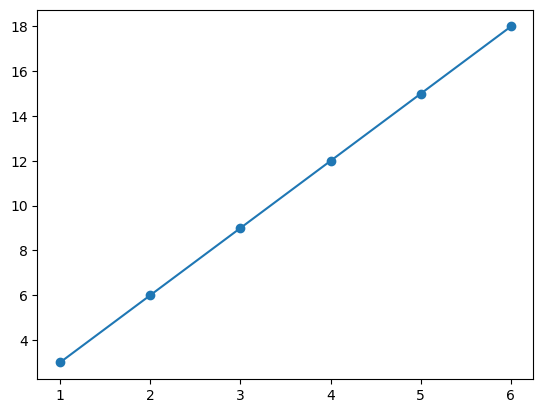

In [7]:
plot_result(net, X, Y)

Understanding exactly what goes on under the hood is beyond the scope of this notebook. For that, buy this book and read it cover to cover:

![](https://zd8d32753f2xm110ee.s3-us-west-2.amazonaws.com/images/2019-11-13_15-58-12.png)

While you're waiting for that Amazon order to arrive, a high level explanation is this:

 * If you plot the result of the input * weight function, you'd get the curve below
 * If the **error** of the function increasing, the further away from the correct answer it gets
 * You can find the direction you need to nudge the weight in by finding the derivative of the error curve at the current point (also called the gradient)
 * The goal of the training loop above, is to find the minimum error by calculating the gradient each loop pass, and nudging the weight in the correct direction according to the gradient.


![](https://miro.medium.com/max/1204/1*t6OiVIMKw3SBjNzj-lp_Fw.png)

`optimizer.zero_grad()` zeros out the accumulated PyTorch gradients in the linear layer. Explained [here](https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch).

`prediction = net(x)` asks the network to perform a calculation based on the current trained state of the model (also known as a **'forward-pass'**)

`loss = loss_function(prediction, y)` calculates the **error (or loss)** of the current model/network

`loss.backward()` tells PyTorch to perform **'backpropagation'** (calculate the derivative)

`optimizer.step()` the optimizer will take the derivatives and figure out how to nudge the weight to make sure we get closer to the correct answer the next time around.

And that's pretty much it. You've successfully built a super simple neural network that learned the parameter 'b' of a linear function. Easy. 

Let's try a few more examples. I'll be far more course on explaining what's going on here: 

## Linear Regression

Let's try linear regression

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def generate_data(num_x):
    x = list(np.arange(float(num_x)))
    y = [z + np.random.randn(1)[0] for z in x]  # take a random sample from a normal distribution
    return x, y 

In [9]:
X, Y = generate_data(10)

In [10]:
# the default python types are different to pytorch types, so remember to convert them
print(type(X[0]))
print(torch.get_default_dtype())

<class 'numpy.float64'>
torch.float32


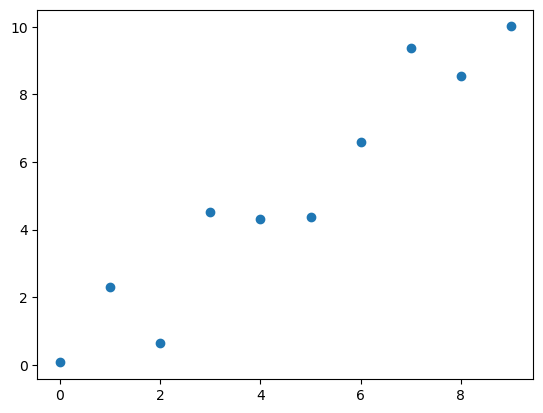

In [11]:
# plot the data we generated
plt.scatter(X, Y)

In [12]:
lnet = Net().float()
optimizer = optim.SGD(lnet.parameters(), lr=0.001, momentum=0.2)

for epoch in range(0, 101):
    for i in range(0, len(X)):
        x = torch.tensor([X[i]], requires_grad=True).float()  # remember, types are different, convert
        y = torch.tensor([Y[i]]).float()  # remember, types are different
        y_ = lnet(x)
        
        optimizer.zero_grad()
        
        loss = loss_function(y_, y)
        loss.backward()
        optimizer.step()
        
    if (epoch % 10 == 0):
        print('Epoch: {} loss: {}'.format(str(epoch), str(loss.item())))

Epoch: 0 loss: 35.605918884277344
Epoch: 10 loss: 0.0009036497795023024
Epoch: 20 loss: 0.0003722869441844523
Epoch: 30 loss: 0.00011917455412913114
Epoch: 40 loss: 9.719188710732851e-06
Epoch: 50 loss: 1.7146670870715752e-05
Epoch: 60 loss: 0.00011875847849296406
Epoch: 70 loss: 0.00029533146880567074
Epoch: 80 loss: 0.0005307453102432191
Epoch: 90 loss: 0.0008115209056995809
Epoch: 100 loss: 0.0011261961190029979


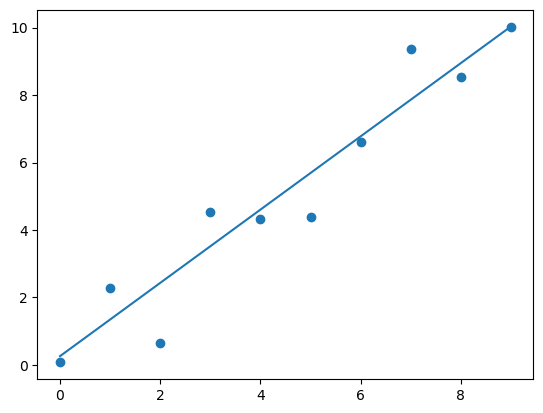

In [13]:
results = [lnet(torch.tensor([y]).float()).item() for y in X]
plot_result(lnet, X, Y)

## Neural network for a parabola 

Let's try building a neural network that can learn the parameters for a parabola. 

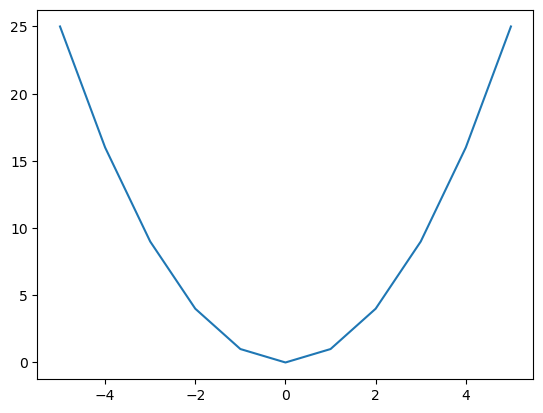

In [28]:
X = np.arange(-5.0, 6.0)

Y = [x**2 for x in X]

plt.plot(X, Y)

In [29]:
class PNet(nn.Module):
    def __init__(self):
        super(PNet, self).__init__()
        self.fc1 = nn.Linear(1, 2)
        self.fc2 = nn.Sigmoid()
        self.fc3 = nn.Linear(2, 1)
       
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

Epoch: 0.00 loss: 630.28
Epoch: 100.00 loss: 259.37
Epoch: 200.00 loss: 262.93
Epoch: 300.00 loss: 270.47
Epoch: 400.00 loss: 274.66
Epoch: 500.00 loss: 258.63
Epoch: 600.00 loss: 174.46
Epoch: 700.00 loss: 118.91
Epoch: 800.00 loss: 84.72
Epoch: 900.00 loss: 61.71
Epoch: 1000.00 loss: 45.82
Epoch: 1100.00 loss: 34.73
Epoch: 1200.00 loss: 26.92
Epoch: 1300.00 loss: 21.36
Epoch: 1400.00 loss: 17.34
Epoch: 1500.00 loss: 14.40
Epoch: 1600.00 loss: 12.22
Epoch: 1700.00 loss: 10.58
Epoch: 1800.00 loss: 9.34
Epoch: 1900.00 loss: 8.38


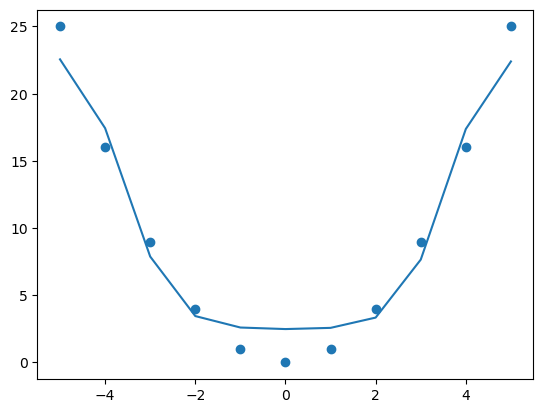

In [30]:
pnet = PNet().float()

# least squares
def loss_function(prediction, actual):
    return (actual - prediction)**2

optimizer = optim.SGD(pnet.parameters(), lr=0.001, momentum=0.1)

for epoch in range(0, 2000):
    for i in range(0, len(X)):
        x = torch.tensor([X[i]], requires_grad=True).float()
        y = torch.tensor([Y[i]]).float()
        prediction = pnet(x)
        
        loss = loss_function(prediction, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch % 100 == 0):
        print('Epoch: {:.2f} loss: {:.2f}'.format(epoch, loss.item()))

# if you get a straight line, then the network **didn't converge**. Try running it again        
        
plot_result(pnet, X, Y)
        

## Linear function



![](https://s3-ap-southeast-2.amazonaws.com/horserankimages/images/Image20181121002.png) 

The h1 node above gets calculated using the "Dot Product" of the input vector and the weight vector:

$$
h_1 = i_1 \cdot w_1 + i_2 \cdot w_2
$$

A couple of things to note: 

* The output layer is simply this dot product calculation chained together for the entire network. 
* When an individual node is close to "1", it is basically the weights signaling "I've seen this before!"



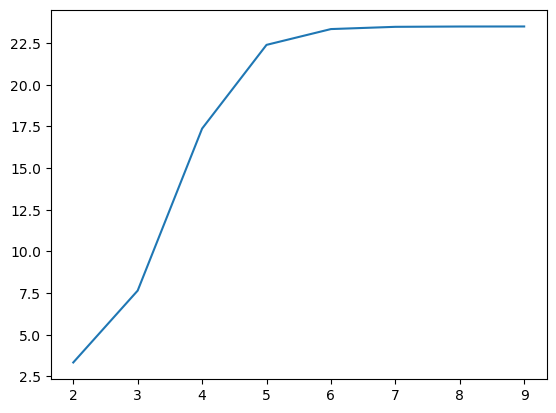

In [31]:
# A great example of overfitting!

X = np.arange(2.0, 10.0)
Y = [pnet(torch.tensor([x]).float()).detach().numpy() for x in X]
plt.plot(X,Y)

## Add more layers and nodes

Clearly, the above example overfit. Adding extra layers and nodes improves things significantly

In [32]:
#Let's try that again!

X = np.arange(-5.0, 6.0)
Y = [x**2 for x in X]

class PNet(nn.Module):
    def __init__(self):
        super(PNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.ReLU()
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.ReLU()
        self.fc5 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
pnet = PNet().float()

# least squares
def criterion(out, label):
    return (label - out)**2

optimizer = optim.SGD(pnet.parameters(), lr=0.001, momentum=0.1)

for epoch in range(0, 2000):
    for i in range(0, len(X)):
        x = torch.tensor([X[i]], requires_grad=True).float()
        y = torch.tensor([Y[i]]).float()
        y_ = pnet(x)
        
        loss = criterion(y_, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch % 100 == 0):
        print('Epoch: {} loss: {}'.format(str(epoch), str(loss.item())))

Epoch: 0 loss: 590.6538696289062
Epoch: 100 loss: 6.304247856140137
Epoch: 200 loss: 4.369113445281982
Epoch: 300 loss: 3.771472930908203
Epoch: 400 loss: 3.4472603797912598
Epoch: 500 loss: 3.2059061527252197
Epoch: 600 loss: 2.9549801349639893
Epoch: 700 loss: 2.6307036876678467
Epoch: 800 loss: 2.135798692703247
Epoch: 900 loss: 1.0878195762634277
Epoch: 1000 loss: 0.003154156729578972
Epoch: 1100 loss: 2.0137522369623184e-06
Epoch: 1200 loss: 5.125799361849204e-06
Epoch: 1300 loss: 0.0008934157085604966
Epoch: 1400 loss: 0.0008060423424467444
Epoch: 1500 loss: 0.0007054245797917247
Epoch: 1600 loss: 0.0006009927019476891
Epoch: 1700 loss: 0.0005197733407840133
Epoch: 1800 loss: 0.00039454386569559574
Epoch: 1900 loss: 0.00023097172379493713


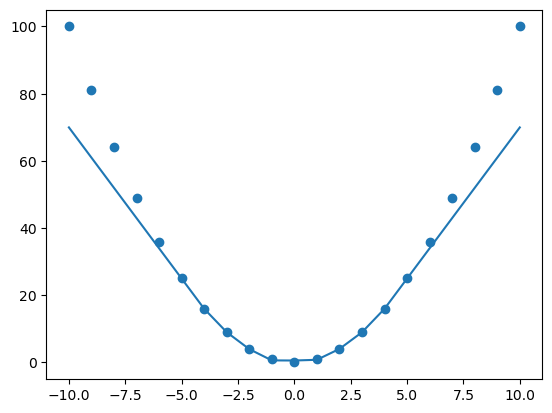

In [33]:
# no longer overfitting that badly, but still not great. 
X = np.arange(-10.0, 11.0)
Y = [x**2 for x in X]
# Y = [pnet(torch.tensor([x])) for x in X]
plot_result(pnet, X, Y)

## NN for non-linear function

Let's try building a NN that deals with a parabola

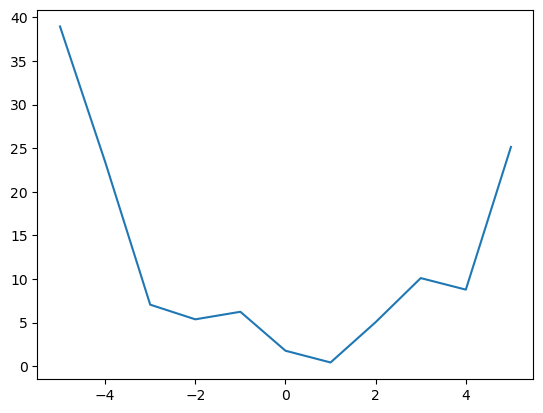

In [20]:
X = np.arange(-5.0, 6.0)

# really crazy Y
Y = [float((np.random.randn(1) + x))**2.0 for x in X]

# noisy parabola
#Y = [float(x**2.0 + np.random.randn(1) + 3.0) for x in X]
plt.plot(X, Y)

In [21]:
class NonLinearNet(nn.Module):
    def __init__(self):
        super(NonLinearNet, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Sigmoid()
        self.fc3 = nn.Linear(5, 5)
        self.fc4 = nn.ReLU()
        self.fc5 = nn.Linear(5, 1)
       
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return x

In [22]:
nonlnet = NonLinearNet()

# least squares
def criterion(out, label):
    return (label - out)**2

optimizer = optim.SGD(nonlnet.parameters(), lr=0.001, momentum=0.1)

In [23]:
for epoch in range(0, 1000):
    for i in range(0, len(X)):
        x = torch.tensor([X[i]], requires_grad=True).float()
        y = torch.tensor([Y[i]]).float()
        y_ = nonlnet(x)
        
        loss = criterion(y_, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (epoch % 100 == 0):
        print('Epoch: {} loss: {}'.format(str(epoch), str(loss.item())))

Epoch: 0 loss: 624.072021484375
Epoch: 100 loss: 80.38497924804688
Epoch: 200 loss: 55.96634292602539
Epoch: 300 loss: 51.60333251953125
Epoch: 400 loss: 50.64577865600586
Epoch: 500 loss: 48.12451171875
Epoch: 600 loss: 40.952083587646484
Epoch: 700 loss: 30.078516006469727
Epoch: 800 loss: 18.275850296020508
Epoch: 900 loss: 8.98275089263916


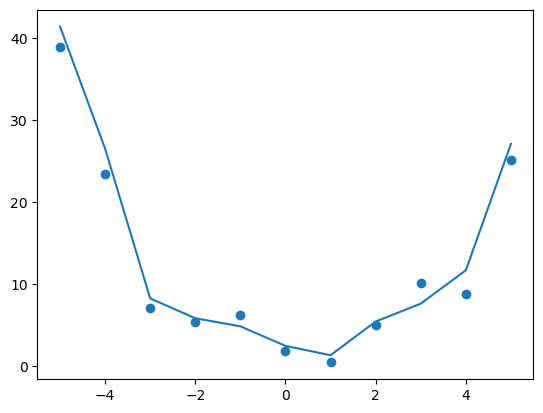

In [24]:
plot_result(nonlnet, X, Y)

## Activation Functions

You may have noticed a few strange calls in the forward() pass of our parabola neural network: ```nn.Sigmoid()``` and ```nn.ReLU()```. These are calls to activation functions, and they are essential to the learning capacity of a network.

TODO: explain this

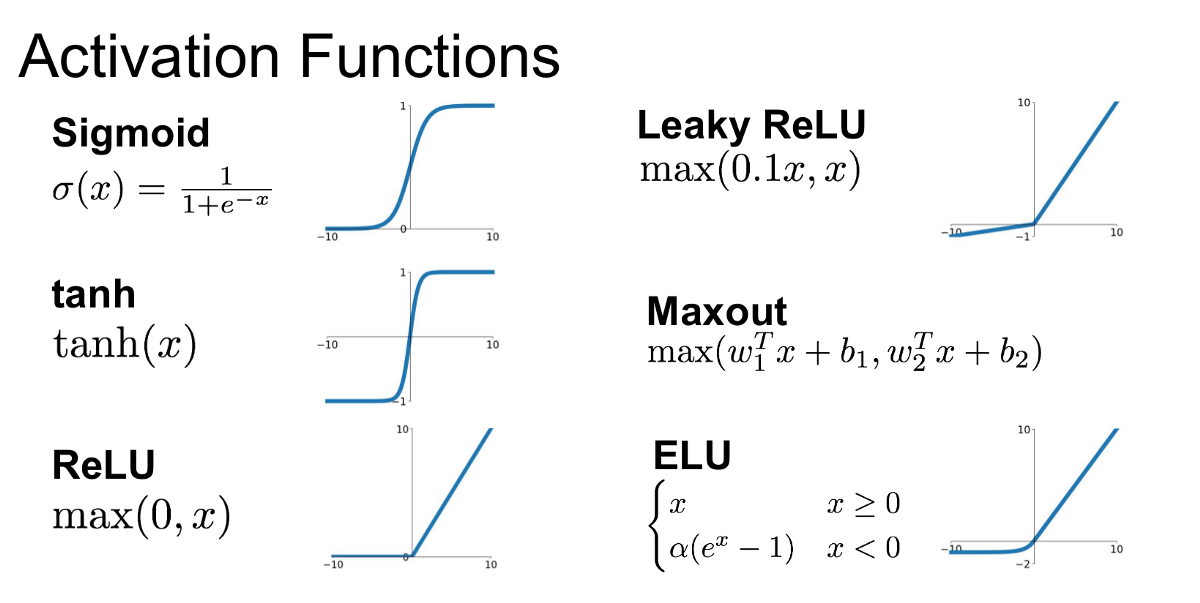
